In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname,filename)
        



2024-10-29 18:00:46.707955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 18:00:46.708139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 18:00:46.893652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 224

datagen = ImageDataGenerator(validation_split=0.2,
        rescale=1./255,#rescaling pixel values bw [0,1]
        rotation_range=10,#adjusting any error in angle of image
        zoom_range=0.2
)


In [4]:
#this will distribute data in test and training set proportionally for each class
train_generator = datagen.flow_from_directory(
    '/kaggle/input/car-angle-classification-dataset/dataset',
    target_size=(224, 224),  
    batch_size=16,
    class_mode='sparse',  # Use 'sparse' for integer labels
    subset='training'  # Specify that this is the training set
)

test_generator = datagen.flow_from_directory(
    '/kaggle/input/car-angle-classification-dataset/dataset',
    target_size=(224, 224), 
    batch_size=16,
    class_mode='sparse',  # Use 'sparse' for integer labels
    subset='validation'  # Specify that this is the validation set
)

Found 21636 images belonging to 8 classes.
Found 5406 images belonging to 8 classes.


In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['0', '130', '180', '230', '270', '320', '40', '90']

In [6]:
sz = 224

# Initializing the CNN
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), input_shape=(sz, sz, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())#tranferring data into 1D format

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))#will prevent overfitting
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])


In [8]:
#evaluating test and train accuracy
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=8
)

Epoch 1/8


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1353/1353 ━━━━━━━━━━━━━━━━━━━━ 970s 713ms/step - accuracy: 0.5519 - loss: 1.2184 - val_accuracy: 0.8368 - val_loss: 0.4767
Epoch 2/8
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 895s 660ms/step - accuracy: 0.8091 - loss: 0.5649 - val_accuracy: 0.8620 - val_loss: 0.4132
Epoch 3/8
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 927s 684ms/step - accuracy: 0.8432 - loss: 0.4822 - val_accuracy: 0.8866 - val_loss: 0.3514
Epoch 4/8
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 932s 688ms/step - accuracy: 0.8617 - loss: 0.4282 - val_accuracy: 0.9016 - val_loss: 0.3288
Epoch 5/8
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 902s 666ms/step - accuracy: 0.8702 - loss: 0.3935 - val_accuracy: 0.9068 - val_loss: 0.3036
Epoch 6/8
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 888s 655ms/step - accuracy: 0.8779 - loss: 0.3742 - val_accuracy: 0.9119 - val_loss: 0.2819
Epoch 7/8
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 861s 635ms/step - accuracy: 0.8917 - loss: 0.3440 - val_accuracy: 0.9145 - val_loss: 0.2843
Epoch 8/8
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 862s 636ms/step - accuracy: 0.8937 - l

In [9]:
scores = model.evaluate(test_generator)


338/338 ━━━━━━━━━━━━━━━━━━━━ 102s 303ms/step - accuracy: 0.9190 - loss: 0.2800


In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [11]:
type(history.history['loss'])

list

In [12]:
len(history.history['loss'])


8

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

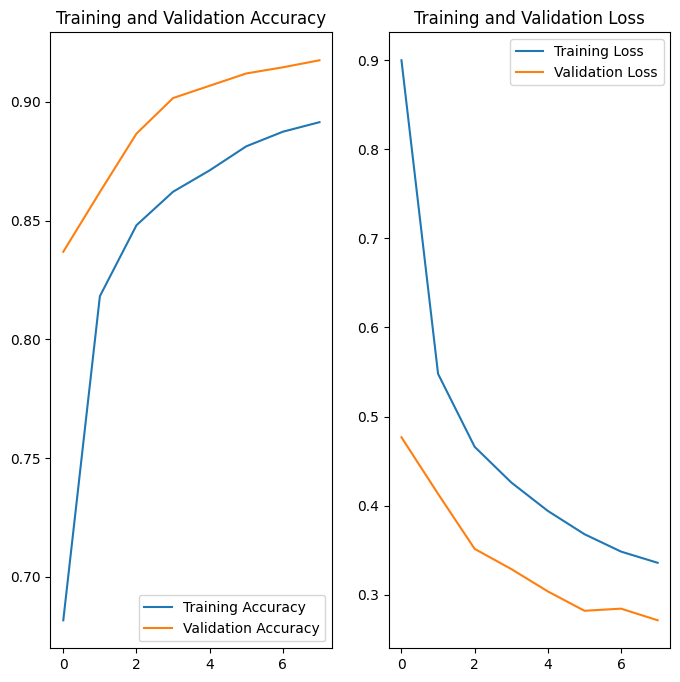

In [14]:
import matplotlib.pyplot as plt
EPOCHS = 8

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
# Save the trained model in H5 format for compatibility with Keras 3
model.save("car_angle_classification_model_peeki.h5")
print("Model saved as car_angle_classification_model_peeki.h5")

# Create a downloadable link for the model file
from IPython.display import FileLink
FileLink("car_angle_classification_model_peeki.h5")

Model saved as car_angle_classification_model_peeki.h5


/kaggle/working/car_angle_classification_model_peeki.h5